<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA
</center></font>


<center><h2>Actividad 4</h2></center>
<center><h3>Image</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Diddier Cofré</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>


## 1. Operaciones usando Pytorch y OpenCV

### 1.1 Instala Numpy, Pytorch y OpenCV:
- Carga una imagen desde un archivo con extensión JPG, usando numpy, pytorch y opencv.
- Presenta la imagen
- Transforma la imagen de color a escala de grises usando cada uno de los paquetes
- Guarda la imagen nueva.
- Presenta la imagen transformada en el notebook.

<p align="justify">
Asegurate de presentar adecuandamente la imagen, usando Matplotlib u otro medio de ploteo.

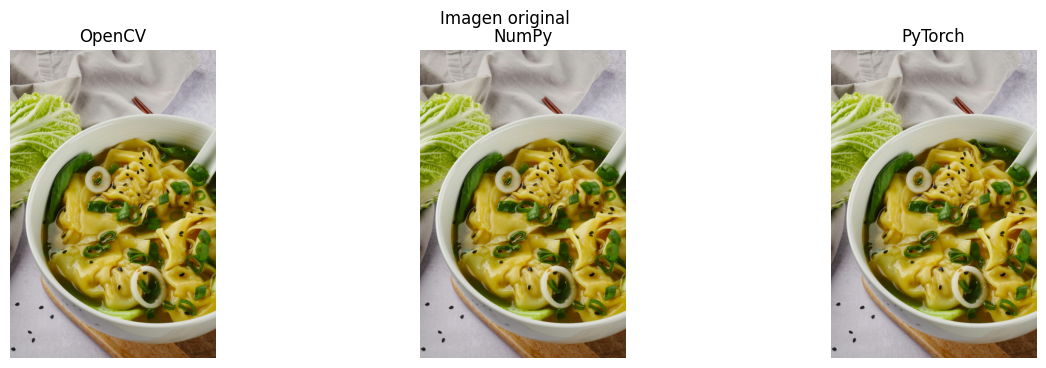

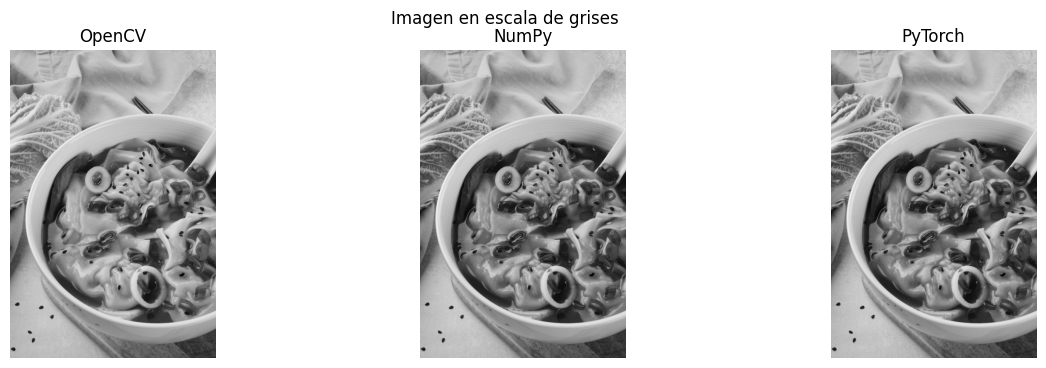

In [33]:
import numpy as np
import cv2
import torch
import matplotlib.pyplot as plt
from PIL import Image

# Cargar imagen
ruta_imagen = 'imagen.jpg'

# Con OpenCV
imagen_cv2 = cv2.imread(ruta_imagen)
imagen_cv2_rgb = cv2.cvtColor(imagen_cv2, cv2.COLOR_BGR2RGB) # De BGR a RGB

# Con NumPy
imagen_np = np.array(Image.open(ruta_imagen))

# Con PyTorch
imagen_pil = Image.open(ruta_imagen).convert("RGB") # Cargar imagen con ejes originales (Altura, Ancho, Canales)
imagen_tensor = torch.from_numpy(np.array(imagen_pil)).permute(2, 0, 1)  # Ordenar el orden de los ejes (Canales, Altura, Ancho)

# Mostrar imagen original
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
plt.title("OpenCV")
plt.imshow(imagen_cv2_rgb)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("NumPy")
plt.imshow(imagen_np)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("PyTorch")
plt.imshow(imagen_tensor.permute(1, 2, 0))  # Volver al orden original de los ejes (Altura, Ancho, Canales)
plt.axis('off')
plt.suptitle("Imagen original")
plt.show()

# Convertir a escala de grises

# OpenCV
gris_cv2 = cv2.cvtColor(imagen_cv2, cv2.COLOR_BGR2GRAY)
cv2.imwrite("gris_opencv.jpg", gris_cv2) # Guardar imagen

# NumPy (usando promedio de canales)
gris_np = imagen_np.mean(axis=2).astype(np.uint8) # Promedio de los tres canales RGB por cada píxel (Escala de grises desde el 0 hasta el 255)
Image.fromarray(gris_np).save("gris_numpy.jpg") # Guardar imagen

# PyTorch (usando promedio de canales)
gris_tensor = imagen_tensor.float().mean(dim=0).byte() # Promedio de los tres canales RGB por cada píxel (Escala de grises desde el 0 hasta el 255)
Image.fromarray(gris_tensor.numpy()).save("gris_pytorch.jpg") # Guardar imagen

# Mostrar imágenes en escala de grises

plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
plt.title("OpenCV")
plt.imshow(gris_cv2, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("NumPy")
plt.imshow(gris_np, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("PyTorch")
plt.imshow(gris_tensor, cmap='gray')
plt.axis('off')
plt.suptitle("Imagen en escala de grises")
plt.show()

## 2. Multiples operaciones con tensores
### ¡USA LA IMAGEN ADJUNTA image.png!

#### 2.1 Aplica una transformación puntual. Modifica el valor de los pixeles considerando un valor de umbral (threshold). la función de treshold debe ser una rampa con una pendiente dada (tu defines el valor de la pendiente) y cuyo valor mínimo será 0 y el máximo será 255 (valores típicos de los pixeles).

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

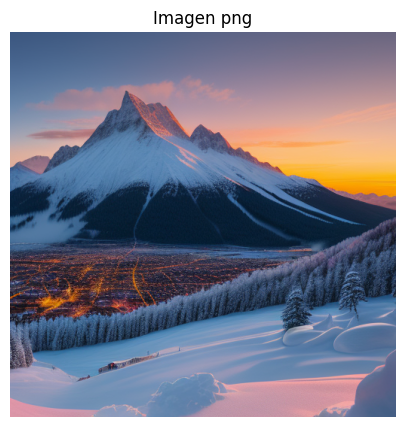

In [34]:
# Cargar y graficar imagen original
rutapng = "image.png" # Ruta donde se encuentra la imagen
imagenPng = cv2.imread(rutapng) # Cargar la imagen png original
imagenPng = cv2.cvtColor(imagenPng, cv2.COLOR_BGR2RGB) # De BGR a RGB
plt.figure(figsize = (10,5)) # Crear figura
plt.imshow(imagenPng) # Mostrar imagen
plt.title("Imagen png") # Título
plt.axis("off") # Ocultar los ejes


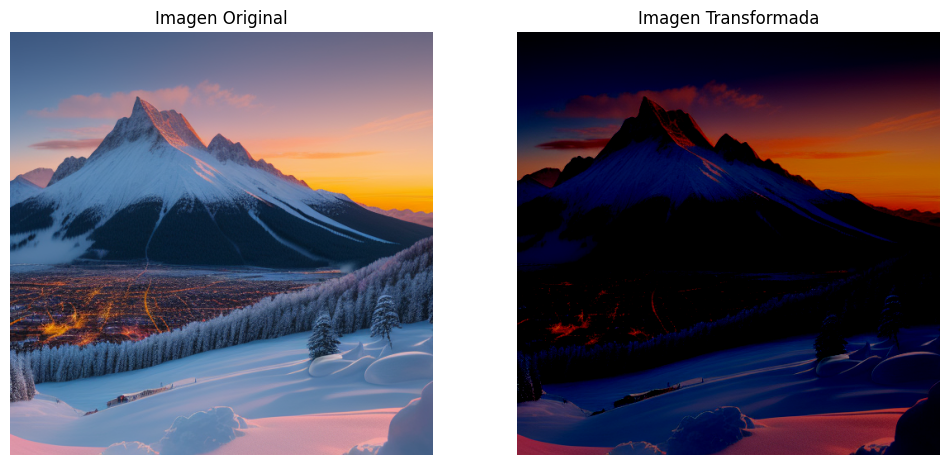

In [35]:
import numpy as np
import matplotlib.pyplot as plt


def apply_threshold_color(image, threshold, pendiente):
    # Crear una imagen vacia del mismo tamaño y tipo
    transformed_image = np.zeros_like(image)

    for c in range(3):  # Recorrer los 3 canales de color: R=0, G=1, B=2
        for i in range(image.shape[0]):  # Recorrer las filas (alto de la imagen)
            for j in range(image.shape[1]):  # Recorrer las columnas (ancho de la imagen)

                pixel = image[i, j, c]  # Obtener el valor del píxel en la posición (i, j) del canal c (R, G o B)

                if pixel < threshold:  # Si el valor del píxel es menor al umbral
                    transformed_image[i, j, c] = 0  # Se asigna el valor 0 (oscuro)
                else:
                    # Se aplica la transformación tipo rampa con la pendiente definida
                    nuevo_valor = min(255, pendiente * (pixel - threshold))  # Se asegura de no superar 255
                    transformed_image[i, j, c] = nuevo_valor  # Se guarda el nuevo valor en la imagen transformada


    return transformed_image.astype(np.uint8)

threshold = 128 # Umbral
pendiente = 1.5 # Pendiente
imagen_transformada = apply_threshold_color(imagenPng, threshold, pendiente) # Aplicar la transformación

# Mostrar resultados
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Imagen Original")
plt.imshow(imagenPng)
plt.axis("off")
plt.subplot(1, 2, 2)
plt.title("Imagen Transformada")
plt.imshow(imagen_transformada)
plt.axis("off")
plt.show()

#### 2.2 Aplica una transformación en la vecindad.
- Debes hacer una vecindad con dimensiones de 5x5 pixeles.
- Aplica la transformación de tal forma que los pixeles cambien para tener el valor correspondiente al máximo de todos los vecinos.
- Debes hacer la misma operación a lo largo y ancho de toda la imagen. Esto implica, de forma iterativa, recorrer la imagen.



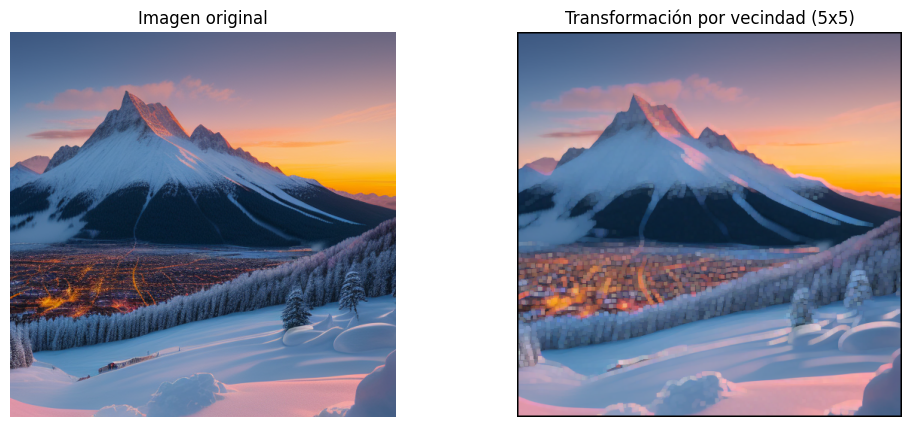

In [32]:
# Función de vecindad 5x5: cada píxel toma el valor máximo de sus vecinos
def vecindad_maxima(imagen, tam_vecindad):
    alto, ancho, canales = imagen.shape # Obtener el tamaño de la imagen
    offset = tam_vecindad // 2
    imagen_salida = np.zeros_like(imagen) # Se crea una nueva imagen vacía del mismo tamaño para guardar los resultados (Imagen de salida)

    for i in range(offset, alto - offset): # Recorremos las filas evitando los bordes
        for j in range(offset, ancho - offset): # Recorremos las columnas evitando los bordes
            for c in range(3):  # Para cada canal de color (R, G, B)
                bloque = imagen[i - offset:i + offset + 1, j - offset:j + offset + 1, c] # Se extrae una vecindad de 5x5 píxeles alrededor del píxel actual para el canal c
                maximo = np.max(bloque) # Se obtiene el valor maximo dentro de cada vecindad
                imagen_salida[i, j, c] = maximo # Se asigna ese valor máximo al píxel central en la imagen de salida.

    return imagen_salida

# Aplicar transformación
Tvecindad = 5 # En este caso 5x5
imagenVecindad = vecindad_maxima(imagenPng, Tvecindad)

# --- Mostrar resultados ---
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(imagenPng)
plt.title("Imagen original")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(imagenVecindad)
plt.title("Transformación por vecindad (5x5)")
plt.axis("off")

plt.show()


#### 2.3 Aplica transformación de intensidad
![image.png](attachment:image.png)
- Debes hacer una vecindad con dimensiones de 10x10 pixeles.
- Aplica la transformación que aparece en la ecuación de tal forma que los pixeles cambien dependiendo de la posición (r) y el coeficiente c (de tu elección).
- Debes hacer la misma operación a lo largo y ancho de toda la imagen. Esto implica, de forma iterativa, recorrer la imagen.

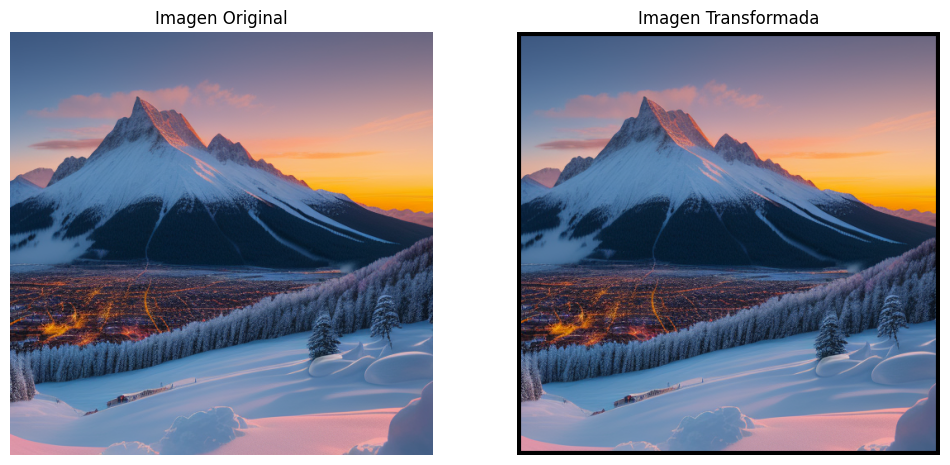

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Crear la función
def transformacion_vecindad_log(image, c, Tvecindad):
    alto, ancho, canales = image.shape # Dimensiones de la imagen
    offset = Tvecindad // 2
    img_transformada = np.zeros_like(image) # Se crea una nueva imagen vacía del mismo tamaño para guardar los resultados (Imagen de salida)

    for i in range(offset, alto - offset): # Se recorren las filas evitando los bordes
        for j in range(offset, ancho - offset): # Se recorren las columnas evitando los bordes
            for c_idx in range(canales):
                # Se extrae la vecindad 10x10 alrededor del píxel (i,j)
                vecindad = image[i - offset:i + offset + 1, j - offset:j + offset + 1, c_idx]

                # Se calcula el centro de la vecindad
                centro = offset

                # Posición relativa r como distancia de cada pixel al centro
                for m in range(Tvecindad):
                    for n in range(Tvecindad):
                        r = np.sqrt((m - centro)**2 + (n - centro)**2)
                        # Aplicamos la fórmula s = c * log(1 + r)
                        s = c * np.log(1 + r)

                        # Se calcula el nuevo valor
                        val_original = vecindad[m, n]
                        val_nuevo = val_original * (1 + s / np.log(1 + np.sqrt(2) * centro))

                        # Para este píxel (i,j), se asigna el valor transformado del centro de la vecindad
                        if m == centro and n == centro:
                            img_transformada[i, j, c_idx] = np.clip(val_nuevo, 0, 255)

    return img_transformada.astype(np.uint8) # Retornar la imagen transformada

# Se aplica la función en una imagen
c = 20 # Coeficiente c
Tvecindad = 10 # Tamaño de la vecindad
imagen_transformada = transformacion_vecindad_log(imagenPng, c, Tvecindad)

# Mostrar la imagen original y la transformada
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Imagen Original")
plt.imshow(imagenPng)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Imagen Transformada")
plt.imshow(imagen_transformada)
plt.axis('off')

plt.show()

#### 2.4 Operación con Kernel
- Realiza tres operaciones de convolución en cascada.
- Utiliza torch nn.Conv2d
- Debes calcular el stride, padding y demás parámetros para que obtengas 16 canales de salida.
- Muestra una imagen de cada canal resultante de la convolución.

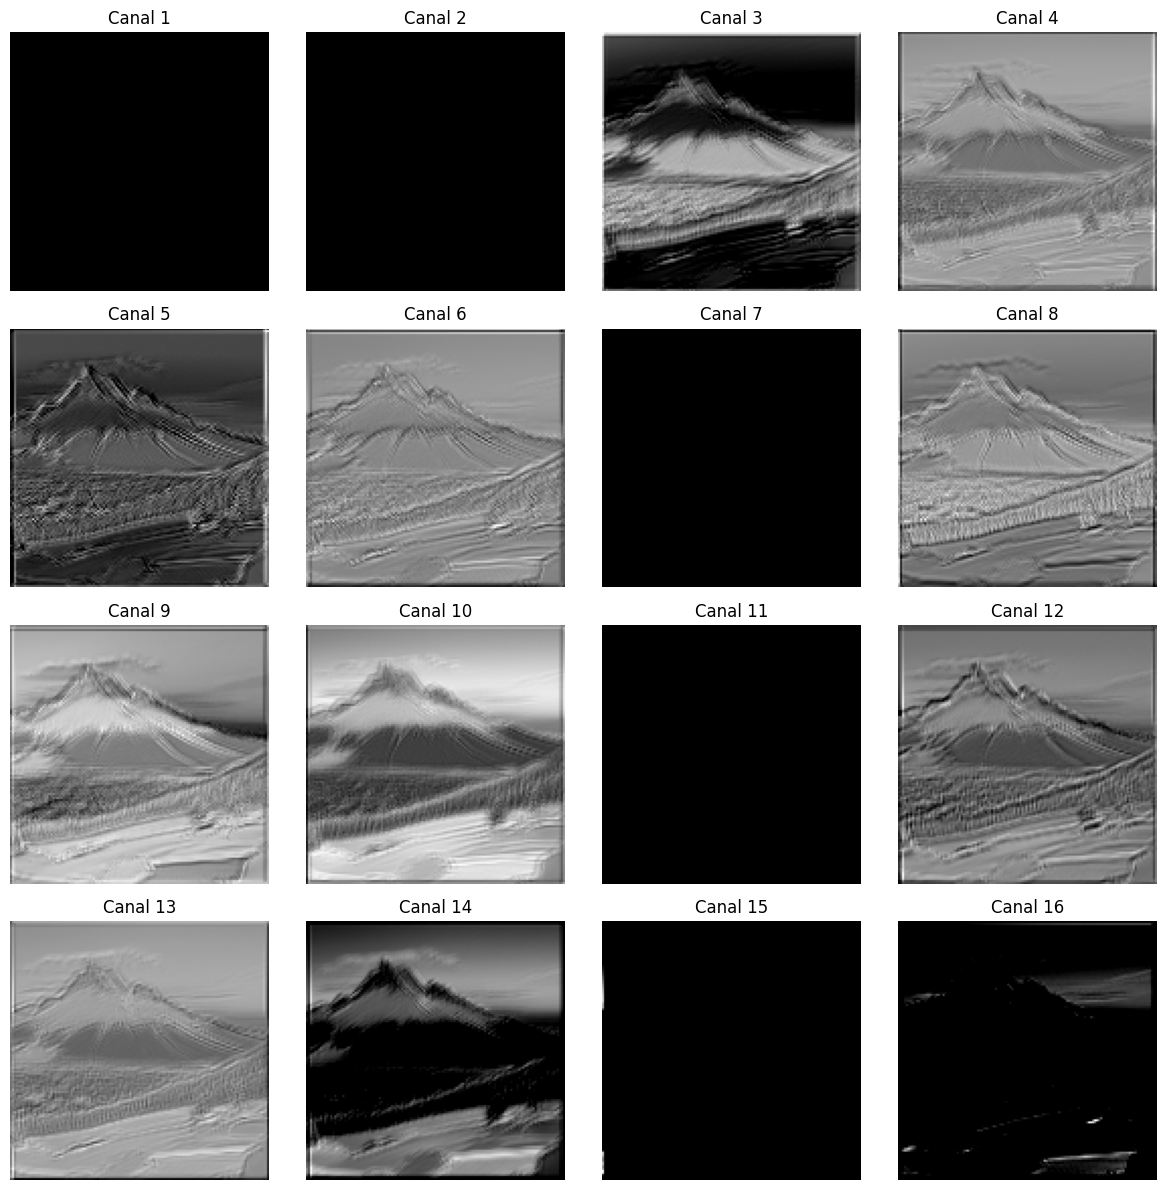

In [40]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Cargar imagen y convertir a RGB
imagen_cv2 = cv2.imread("image.png")
imagen_cv2 = cv2.cvtColor(imagen_cv2, cv2.COLOR_BGR2RGB)
imagen_resized = cv2.resize(imagen_cv2, (128, 128))  # reducir tamaño si es necesario

# Convertir imagen a tensor PyTorch
imagen_tensor = torch.from_numpy(imagen_resized).permute(2, 0, 1).unsqueeze(0).float() / 255.0

# Modelo de convolución en cascada para obtener 16 canales de salida
modelo = nn.Sequential(
    nn.Conv2d(in_channels=3, out_channels=8, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3, stride=1, padding=1),
    nn.ReLU()
)

# Aplicar convoluciones
with torch.no_grad():
    salida = modelo(imagen_tensor)

# Mostrar los 16 canales de salida como imágenes en escala de grises
salida_np = salida.squeeze().numpy()
fig, axs = plt.subplots(4, 4, figsize=(12, 12))
for i in range(16):
    ax = axs[i // 4, i % 4]
    ax.imshow(salida_np[i], cmap='gray')
    ax.axis('off')
    ax.set_title(f'Canal {i+1}')
plt.tight_layout()
plt.show()


## 3. Realiza la inversión de imagen

### 3.1 Utilizando estrictamente numpy, busca y usa una imagen binaria y realizar la inversión de dicha imagen.
### Recuerda adjuntar la imagen a la entrega de tu trabajo.


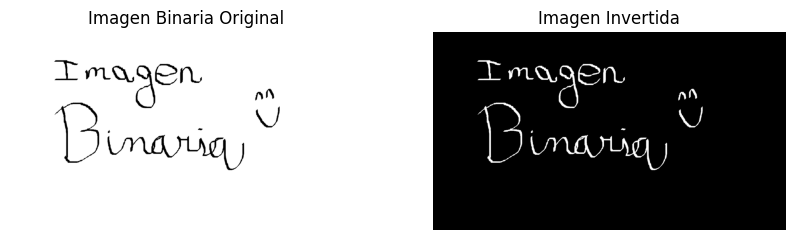

True

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Cargar la imagen binaria
ruta = "imagen_binaria.png"  # Imagen en blanco y negro creada en paint
imagen_binaria = cv2.imread(ruta, cv2.IMREAD_GRAYSCALE)  # Leer en escala de grises

# Invertir la imagen usando NumPy
imagen_invertida = 255 - imagen_binaria  # Intercambia 0 y 255

# Mostrar imágenes
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(imagen_binaria, cmap='gray')
plt.title("Imagen Binaria Original")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(imagen_invertida, cmap='gray')
plt.title("Imagen Invertida")
plt.axis("off")

plt.show()

# Guardar la imagen invertida
cv2.imwrite("imagen_invertida.png", imagen_invertida)


### 3.1 Usando Pytorch y opencv, realiza la inversión de la misma imagen.



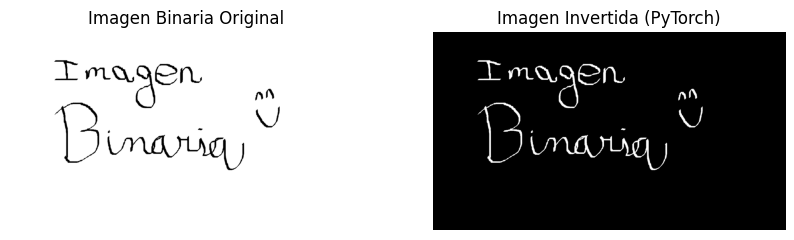

True

In [43]:
import cv2
import torch
import numpy as np
import matplotlib.pyplot as plt

# Cargar imagen binaria con OpenCV
ruta = "imagen_binaria.png"  # Imagen en blanco y negro creada en paint
imagen_binaria = cv2.imread(ruta, cv2.IMREAD_GRAYSCALE) # Leer en escala de grises

# Convertir la imagen de NumPy a Tensor de PyTorch
tensor_img = torch.from_numpy(imagen_binaria).float()

# Invertir la imagen (255 - valor)
tensor_invertida = 255.0 - tensor_img  # Inversión pixel a pixel

# Convertir de vuelta a NumPy
imagen_invertida = tensor_invertida.numpy().astype(np.uint8)

# Mostrar ambas imágenes
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.title("Imagen Binaria Original")
plt.imshow(imagen_binaria, cmap="gray")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Imagen Invertida (PyTorch)")
plt.imshow(imagen_invertida, cmap="gray")
plt.axis("off")

plt.show()

# Guardar la imagen invertida
cv2.imwrite("imagen_invertida_pytorch.png", imagen_invertida)


## 4. Segmentación de imagen
#### 4.1 Realiza un algoritmo para dividir una imagen con 3 canales RGB de 512x512, en parches (secciones) de 16x16. Presenta cada parche generado de la imagen.
El algoritmo debe tolerar el cambio de imagen por una de menor tamano (128, 64). Claramente, en cada caso el número de parches será menor.
    

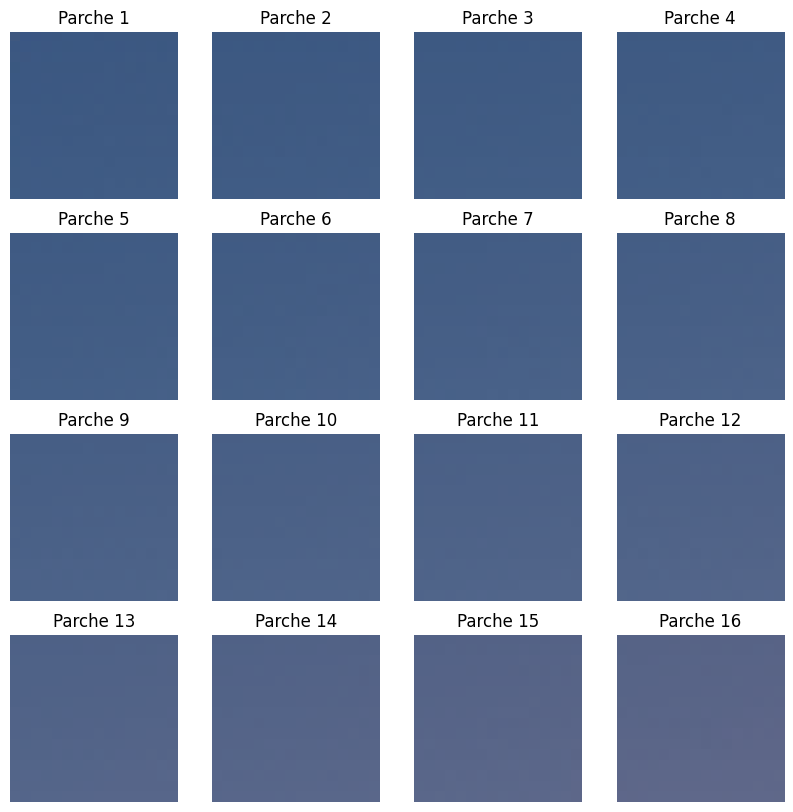

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Función para dividir la imagen en parches
def dividir_en_patches(imagen, patch_size=16):
    alto, ancho, canales = imagen.shape # Dimensiones de la imagen
    patches = [] # Crear lista vacía para guardar los parches

    # Recorrer la imagen en pasos de patch_size (tamaño del parche)
    for i in range(0, alto, patch_size): # Recorre el alto
        for j in range(0, ancho, patch_size): # Recorre el ancho
            # Extraer parche 16x16
            parche = imagen[i:i+patch_size, j:j+patch_size, :]
            patches.append(parche) # Guardar el parche en la lista

    return patches # Retornar la lista completa de parches

# Cargar imagen
ruta_imagen = "image.png" # Cargar la imagen original
imagen = np.array(Image.open(ruta_imagen).convert("RGB")) # Convertimos la imagen a RGB

# Se divide la imagen en parches
patches = dividir_en_patches(imagen, patch_size=16)

# Mostrar algunos parches (por ejemplo los primeros 16)
plt.figure(figsize=(10,10))
for idx in range(min(16, len(patches))):
    plt.subplot(4,4,idx+1)
    plt.imshow(patches[idx])
    plt.axis('off')
    plt.title(f'Parche {idx+1}')
plt.show()


## 5. Referencias
<p align="justify">
    
[OpenCV] https://docs.opencv.org/4.x/d7/da8/tutorial_table_of_content_imgproc.html

[inversion] https://medium.com/analytics-vidhya/inverting-an-image-using-numpys-broadcasting-method-1f5beb7f9fa5#:~:text=In%20order%20to%20invert%20the,negation)%20operation%20to%20the%20image.
